In [1]:
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.datasets import make_regression
from sklearn import linear_model
import numpy as np

In [2]:
df = pd.read_csv('LASSO-data-set.csv')

In [3]:
df

,strength,dexterity,constitution,wisdom,intelligence,charisma,weight,height,modifier1,modifier2,modifier3,modifier4,modifier5,modifier6,modifier7,modifier8,score
0,156,181,54,61,159,60,170,58,56,60,56,60,6,4,4,4,652.566513
1,148,137,89,147,159,79,166,84,47,44,53,49,11,10,5,8,413.145270
2,164,144,79,143,164,84,175,80,51,56,53,56,7,13,12,8,510.830805
3,176,53,84,178,198,85,180,88,37,38,40,36,5,5,0,5,392.261796
4,164,86,86,75,185,93,180,89,45,47,46,48,-1,2,-1,3,472.258696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,147,136,71,183,178,74,164,73,49,54,49,53,13,15,9,10,469.795129
996,180,155,67,162,163,67,173,62,27,22,28,23,5,2,9,7,402.313429
997,191,119,68,193,192,65,173,67,42,33,36,38,9,10,8,5,480.564293
998,160,167,70,92,162,69,175,72,58,64,64,63,1,-1,-1,1,642.229907


In [4]:
indep = df.copy()
indep.drop('score',axis=1,inplace=True)
indep

,strength,dexterity,constitution,wisdom,intelligence,charisma,weight,height,modifier1,modifier2,modifier3,modifier4,modifier5,modifier6,modifier7,modifier8
0,156,181,54,61,159,60,170,58,56,60,56,60,6,4,4,4
1,148,137,89,147,159,79,166,84,47,44,53,49,11,10,5,8
2,164,144,79,143,164,84,175,80,51,56,53,56,7,13,12,8
3,176,53,84,178,198,85,180,88,37,38,40,36,5,5,0,5
4,164,86,86,75,185,93,180,89,45,47,46,48,-1,2,-1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,147,136,71,183,178,74,164,73,49,54,49,53,13,15,9,10
996,180,155,67,162,163,67,173,62,27,22,28,23,5,2,9,7
997,191,119,68,193,192,65,173,67,42,33,36,38,9,10,8,5
998,160,167,70,92,162,69,175,72,58,64,64,63,1,-1,-1,1


In [14]:
dep = df.copy()
dep.drop(['modifier1','modifier2','modifier3','modifier4','modifier5','modifier6','modifier7','modifier8'],axis=1,inplace =True)
dep

,strength,dexterity,constitution,wisdom,intelligence,charisma,weight,height,score
0,156,181,54,61,159,60,170,58,652.566513
1,148,137,89,147,159,79,166,84,413.145270
2,164,144,79,143,164,84,175,80,510.830805
3,176,53,84,178,198,85,180,88,392.261796
4,164,86,86,75,185,93,180,89,472.258696
...,...,...,...,...,...,...,...,...,...
995,147,136,71,183,178,74,164,73,469.795129
996,180,155,67,162,163,67,173,62,402.313429
997,191,119,68,193,192,65,173,67,480.564293
998,160,167,70,92,162,69,175,72,642.229907


In [20]:
#training set
X = df[['strength','dexterity','constitution','wisdom','intelligence','charisma','weight','height']]
y = df['score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

alphas = np.logspace(0,1,100)
#LassoCV
reg = LassoCV(alphas=alphas,cv=5, random_state=0).fit(X_train, y_train)
alphascore =reg.score(X_test, y_test)
alphascore





0.39980918917609753

In [21]:
reg.alpha_

9.770099572992255

In [22]:
preds = reg.predict(X_test)


In [23]:
coeff = reg.coef_
coeff

array([-0.        ,  0.        , -1.7873448 ,  0.04936478,  0.09949929,
       -0.48421349,  3.34209153, -2.44170484])

In [24]:
b=reg.intercept_
b

206.5404123030383

In [11]:
from sklearn.metrics import median_absolute_error

In [25]:
median_absolute_error(y_test, preds)

74.24756631817621

In [29]:
print(f'y= {b}  +  {coeff[2]}x3 + {coeff[3]}x4 + {coeff[4]}x5 + {coeff[5]}x6 + {coeff[6]}x7 + {coeff[7]}x8' )

y= 206.5404123030383  +  -1.787344804425913x3 + 0.04936477792318448x4 + 0.09949928684556111x5 + -0.484213488671657x6 + 3.3420915329390017x7 + -2.4417048445890503x8


In [31]:
#apply regular linear reg
from sklearn.linear_model import LinearRegression

In [37]:
lr = LinearRegression()
lr.fit(X_train,y_train)
preds2 = lr.predict(X_test)


In [38]:
X_test['predictions'] = preds2

C:\Users\Chris\AppData\Local\Temp/ipykernel_7888/3792008703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['predictions'] = preds2


In [41]:
X_test['real'] = y_test

C:\Users\Chris\AppData\Local\Temp/ipykernel_7888/3655186307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['real'] = y_test


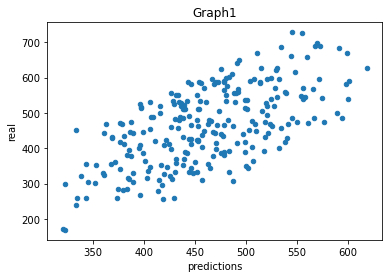

In [43]:
ax = X_test.plot(title = 'Graph1', kind='scatter', x='predictions',y='real')

In [44]:
lr.coef_

array([-0.07200704,  0.00672842, -1.81237395,  0.05366402,  0.10123499,
       -0.43282526,  3.63359685, -2.5337912 ])

In [45]:
lr.intercept_

171.66526131122595

In [53]:
X_test.drop("predictions",axis=1)
X_test.drop("real",axis=1)
scores =lr.score(X_test, y_test)
scores


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 8 is different from 10)